In [1]:
import pandas as pd

aggregate_country_data = pd.read_csv('./2013.01.01-2015.04.30-aggregate-country-data.csv')
aggregate_country_data.head()

,Country,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration
0,United States,"434,944,680","427,058,422","1,202,850,944",59.86%,1.32,0:02:35
1,Canada,"58,957,484","56,514,054","160,809,556",58.49%,1.31,0:02:53
2,United Kingdom,"46,435,791","44,456,259","103,884,722",61.56%,1.35,0:02:25
3,Australia,"23,587,951","22,614,120","58,504,210",61.07%,1.39,0:02:51
4,Germany,"7,542,762","7,057,617","16,473,675",55.65%,1.38,0:03:13


In [3]:
daily_pageviews = pd.read_csv('./2013.01.01-2015.04.30-daily-pageviews.csv')
daily_pageviews.head()

,Day Index,Pageviews
0,1/1/13,"92,812"
1,1/2/13,"182,645"
2,1/3/13,"286,954"
3,1/4/13,"331,373"
4,1/5/13,"194,671"


In [4]:
# Extracting the number of US users from the aggregate country data
us_users = aggregate_country_data.loc[0, 'Users'].replace(',', '')

# Summing the daily pageviews (removing commas for the calculation)
total_pageviews = daily_pageviews['Pageviews'].str.replace(',', '').astype(int).sum()

us_users, total_pageviews

('434944680', 2351171402)

In [5]:
# Converting the 'Day Index' column to a datetime object
daily_pageviews['Day Index'] = pd.to_datetime(daily_pageviews['Day Index'], format='%m/%d/%y')

# Setting the 'Day Index' column as the index for time series analysis
daily_pageviews.set_index('Day Index', inplace=True)

# Converting the 'Pageviews' column to an integer type
daily_pageviews['Pageviews'] = daily_pageviews['Pageviews'].str.replace(',', '').astype(int)

# Resampling the daily data into monthly data
monthly_pageviews = daily_pageviews.resample('M').sum()
monthly_pageviews.head()

,Pageviews
Day Index,
2013-01-31,11509872
2013-02-28,20013973
2013-03-31,25411704
2013-04-30,28910253
2013-05-31,54494358


In [7]:
# Calculating the total users from all countries
total_users_all_countries = aggregate_country_data['Users'].str.replace(',', '').astype(int).sum()

# Calculating the proportion of US viewership
us_proportion = int(us_users) / total_users_all_countries

# Calculating the monthly US pageviews
monthly_us_pageviews = monthly_pageviews * us_proportion

# Saving the monthly US pageviews to a CSV file
output_file_path = './monthly_us_pageviews.csv'
monthly_us_pageviews.to_csv(output_file_path)

# Displaying the first few rows of the final result
monthly_us_pageviews.head(), output_file_path

(               Pageviews
 Day Index               
 2013-01-31  7.326481e+06
 2013-02-28  1.273967e+07
 2013-03-31  1.617554e+07
 2013-04-30  1.840250e+07
 2013-05-31  3.468778e+07,
 './monthly_us_pageviews_2.csv')

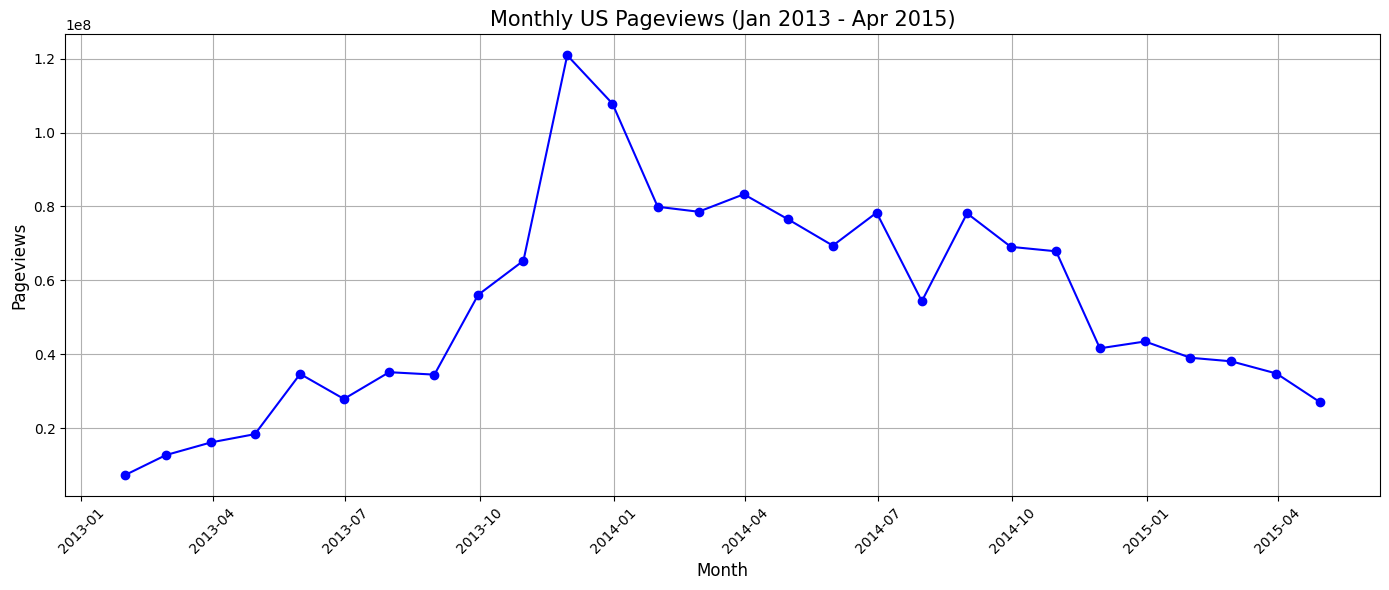

In [9]:
import matplotlib.pyplot as plt

# Plotting the monthly US pageviews
plt.figure(figsize=(14, 6))
plt.plot(monthly_us_pageviews.index, monthly_us_pageviews['Pageviews'], marker='o', linestyle='-', color='b')
plt.title('Monthly US Pageviews (Jan 2013 - Apr 2015)', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Pageviews', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Finding the month corresponding to the peak usage
peak_usage_month = monthly_us_pageviews['Pageviews'].idxmax()
peak_usage_month.strftime('%B %Y')

'November 2013'